In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [21]:
data = {"Toxic": [(1, 21384), (1, 1962)], 
"Hateful": [(1, 2117), (2, 1430), (3, 1143), (7, 4965), (10, 8936), (11, 2979), (12, 1196), (14, 315), (16, 435), (18, 1726), (21, 5935), (25, 22124)], 
"Abusive": [(7, 27150), (18, 4124), (26, 5059)],
"Aggressive": [(17, 570), (17, 548)],
"Offensive": [(2, 19190), (3, 451), (14, 2954), (15, 4640), (21, 5480)],
"Sexism": [(4, 3963), (9, 407), (29, 2719), (30, 550), (20, 2510), (20, 2510)],
"Cyberbullying": [(6, 776), (28, 258)],
"Spam": [(7, 14030), (18, 7744)],
"Religious": [(9, 24), (13, 14988)],
"Slur": [(26, 5059)],
"Harassment": [(19, 5285)],
"Obscene": [(1, 12140)],
"Insult": [(1, 11304)],
"Homophobia": [(9, 887), (4, 87), (26, 5059)],
"Racism": [(9, 1711), (26, 5059), (29, 12), (30, 63)],
"Vulgar": [(27, 3818)],
"Threat": [(1, 689)],
"Profane": [(3, 667)]}

data_sums = []
for item in data.keys():
    data_sum = sum(map(lambda v: v[1], data[item]))
    datasets = ", ".join(map(lambda v: str(v), sorted(list(set(map(lambda v: v[0], data[item]))))))
    data_sums.append([item, data_sum, datasets])

df = pd.DataFrame(data_sums, columns=["Offensive language category", "Number of examples", "Dataset IDs"])
df = df.sort_values(by=["Number of examples"], ascending=False)
df = df.reset_index(drop=True)
df

,Offensive language category,Number of examples,Dataset IDs
0,Hateful,53301,"1, 2, 3, 7, 10, 11, 12, 14, 16, 18, 21, 25"
1,Abusive,36333,"7, 18, 26"
2,Offensive,32715,"2, 3, 14, 15, 21"
3,Toxic,23346,1
4,Spam,21774,"7, 18"
5,Religious,15012,"9, 13"
6,Sexism,12659,"4, 9, 20, 29, 30"
7,Obscene,12140,1
8,Insult,11304,1
9,Racism,6845,"9, 26, 29, 30"


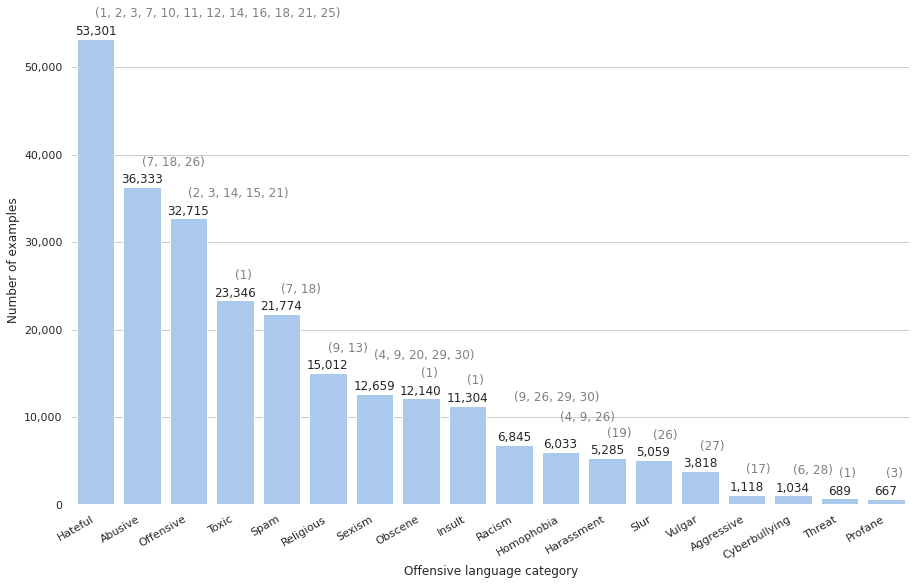

In [59]:
# Initialize the matplotlib figure
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 9))


# Plot the total crashes
sns.set_color_codes("pastel")
g = sns.barplot(x="Offensive language category", y="Number of examples", data=df, color="b")

for index, row in df.iterrows():
    g.text(index,row["Number of examples"] + 450, '{:,.0f}'.format(row["Number of examples"]),  ha="center")
    if index in [6]:
        g.text(index,row["Number of examples"] + 4000, '(' + row["Dataset IDs"] + ')',  ha="left", rotation=0, color="gray")
    elif index in [9]:
        g.text(index,row["Number of examples"] + 5000, '(' + row["Dataset IDs"] + ')',  ha="left", rotation=0, color="gray")
    elif index in [10]:
        g.text(index,row["Number of examples"] + 3500, '(' + row["Dataset IDs"] + ')',  ha="left", rotation=0, color="gray")
    else:
        g.text(index,row["Number of examples"] + 2450, '(' + row["Dataset IDs"] + ')',  ha="left", rotation=0, color="gray")


# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))